# Assignment - 11
# Decision Trees
# Question 1
company data

In [85]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [86]:
sales = pd.read_csv('Company_Data.csv')
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# Applying sweetviz library to explore our data

In [87]:
import sweetviz as sv 
sweet_report = sv.analyze(sales)
sweet_report.show_html('Company_Data.csv.html')   

                                             |                                             | [  0%]   00:00 ->…

Report Company_Data.csv.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [88]:
sales.shape

(400, 11)

In [89]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [90]:
sales.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


By the above information , i am taking some insightful data to create some categories according to their values.

sales = 0,5.5,11,17

CompPrice = 77,115,135,176

Income = 21,43,75,121

Advertising = 0,8,18,30

Population = 10,140,280,510

Price = 24,100,150,192

Age = 25,40,60,81

Education = 10,12,15,19

all the above values taken by considering their minimum,1st quartile,middle approx and maximum values respectively for every column and values are rounded up to nearest values.

In [91]:
sales['Sales'] = pd.cut(x=sales['Sales'],bins=[0, 5.5, 11, 17], labels=['poor','good', 'excellent'], right = False)
sales['Sales']

0           good
1      excellent
2           good
3           good
4           poor
         ...    
395    excellent
396         good
397         good
398         good
399         good
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['poor' < 'good' < 'excellent']

Created categories according to the values taken and named those as poor,good and excellent in the order poor<good<excellent

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

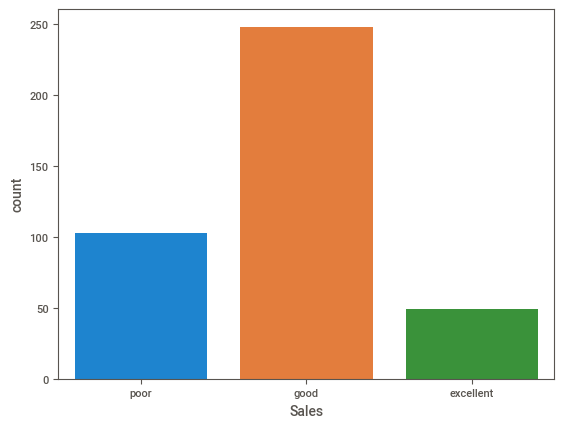

In [92]:
import seaborn as sns
sns.countplot(sales['Sales'])

In [93]:
sales['Sales'].value_counts()

good         248
poor         103
excellent     49
Name: Sales, dtype: int64

converting all other variables into categories

In [94]:
sales['CompPrice'] = pd.cut(x=sales['CompPrice'],bins=[77, 115, 135, 176], labels=['poor','good', 'excellent'], right = False)

sales['Income'] = pd.cut(x=sales['Income'],bins=[21, 43, 75, 121], labels=['poor','good', 'excellent'], right = False)

sales['Advertising'] = pd.cut(x=sales['Advertising'],bins=[0, 8, 18, 30], labels=['poor','good', 'excellent'], right = False)

sales['Population'] = pd.cut(x=sales['Population'],bins=[10, 140, 280, 510], labels=['poor','good', 'excellent'], right = False)

sales['Price'] = pd.cut(x=sales['Price'],bins=[24, 100, 150, 192], labels=['poor','good', 'excellent'], right = False)

sales['Age'] = pd.cut(x=sales['Age'],bins=[25, 40, 60, 81], labels=['poor','good', 'excellent'], right = False)

sales['Education'] = pd.cut(x=sales['Education'],bins=[10, 12, 15, 19], labels=['poor','good', 'excellent'], right = False)

In [95]:
sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,good,excellent,good,good,good,good,Bad,good,excellent,Yes,Yes
1,excellent,poor,good,good,good,poor,Good,excellent,poor,Yes,Yes
2,good,poor,poor,good,good,poor,Medium,good,good,Yes,Yes
3,good,good,excellent,poor,excellent,poor,Medium,good,good,Yes,Yes
4,poor,excellent,good,poor,excellent,good,Bad,poor,good,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,excellent,excellent,excellent,good,good,good,Good,poor,good,Yes,Yes
396,good,excellent,poor,poor,poor,good,Medium,good,poor,No,Yes
397,good,excellent,poor,good,excellent,excellent,Medium,good,excellent,Yes,Yes
398,good,poor,excellent,poor,excellent,poor,Bad,good,good,Yes,Yes


converted all numerical values into some categories

In [96]:
label_encoder = preprocessing.LabelEncoder()

sales['Sales'] = label_encoder.fit_transform(sales['Sales'])
sales['CompPrice'] = label_encoder.fit_transform(sales['CompPrice'])
sales['Income'] = label_encoder.fit_transform(sales['Income'])
sales['Advertising'] = label_encoder.fit_transform(sales['Advertising'])
sales['Population'] = label_encoder.fit_transform(sales['Population'])
sales['Price'] = label_encoder.fit_transform(sales['Price'])
sales['ShelveLoc'] = label_encoder.fit_transform(sales['ShelveLoc'])
sales['Age'] = label_encoder.fit_transform(sales['Age'])
sales['Education'] = label_encoder.fit_transform(sales['Education'])
sales['Urban'] = label_encoder.fit_transform(sales['Urban'])
sales['US'] = label_encoder.fit_transform(sales['US'])

sales

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,0,1,1,1,1,0,1,0,1,1
1,0,2,1,1,1,2,1,0,2,1,1
2,1,2,2,1,1,2,2,1,1,1,1
3,1,1,0,2,0,2,2,1,1,1,1
4,2,0,1,2,0,1,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,1,1,1,1,2,1,1,1
396,1,0,2,2,2,1,2,1,2,0,1
397,1,0,2,1,0,0,2,1,0,1,1
398,1,2,0,2,0,2,0,1,1,1,1


0= excellent 1 = good  2 = poor

In [97]:
x = sales.drop('Sales', axis = 1)
y = sales['Sales']

In [98]:
x 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,1,1,1,1,0,1,0,1,1
1,2,1,1,1,2,1,0,2,1,1
2,2,2,1,1,2,2,1,1,1,1
3,1,0,2,0,2,2,1,1,1,1
4,0,1,2,0,1,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,1,1,1,1,2,1,1,1
396,0,2,2,2,1,2,1,2,0,1
397,0,2,1,0,0,2,1,0,1,1
398,2,0,2,0,2,0,1,1,1,1


In [99]:
y

0      1
1      0
2      1
3      1
4      2
      ..
395    0
396    1
397    1
398    1
399    1
Name: Sales, Length: 400, dtype: int32

In [100]:
sales['Sales'].unique() 

array([1, 0, 2])

In [101]:
sales['Sales'].value_counts()

1    248
2    103
0     49
Name: Sales, dtype: int64

In [102]:
colnames = list(sales.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [103]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=42) 

# Decision tree model

# C 5.0 Model with entropy criteria

In [104]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

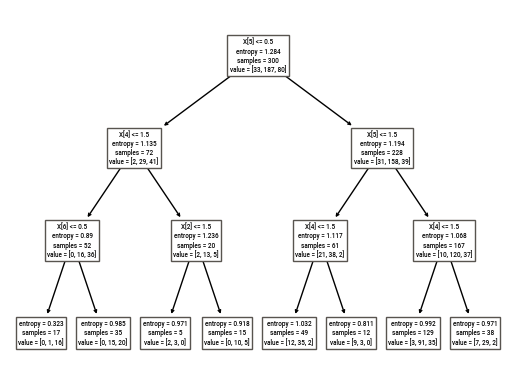

In [105]:
tree.plot_tree(model);

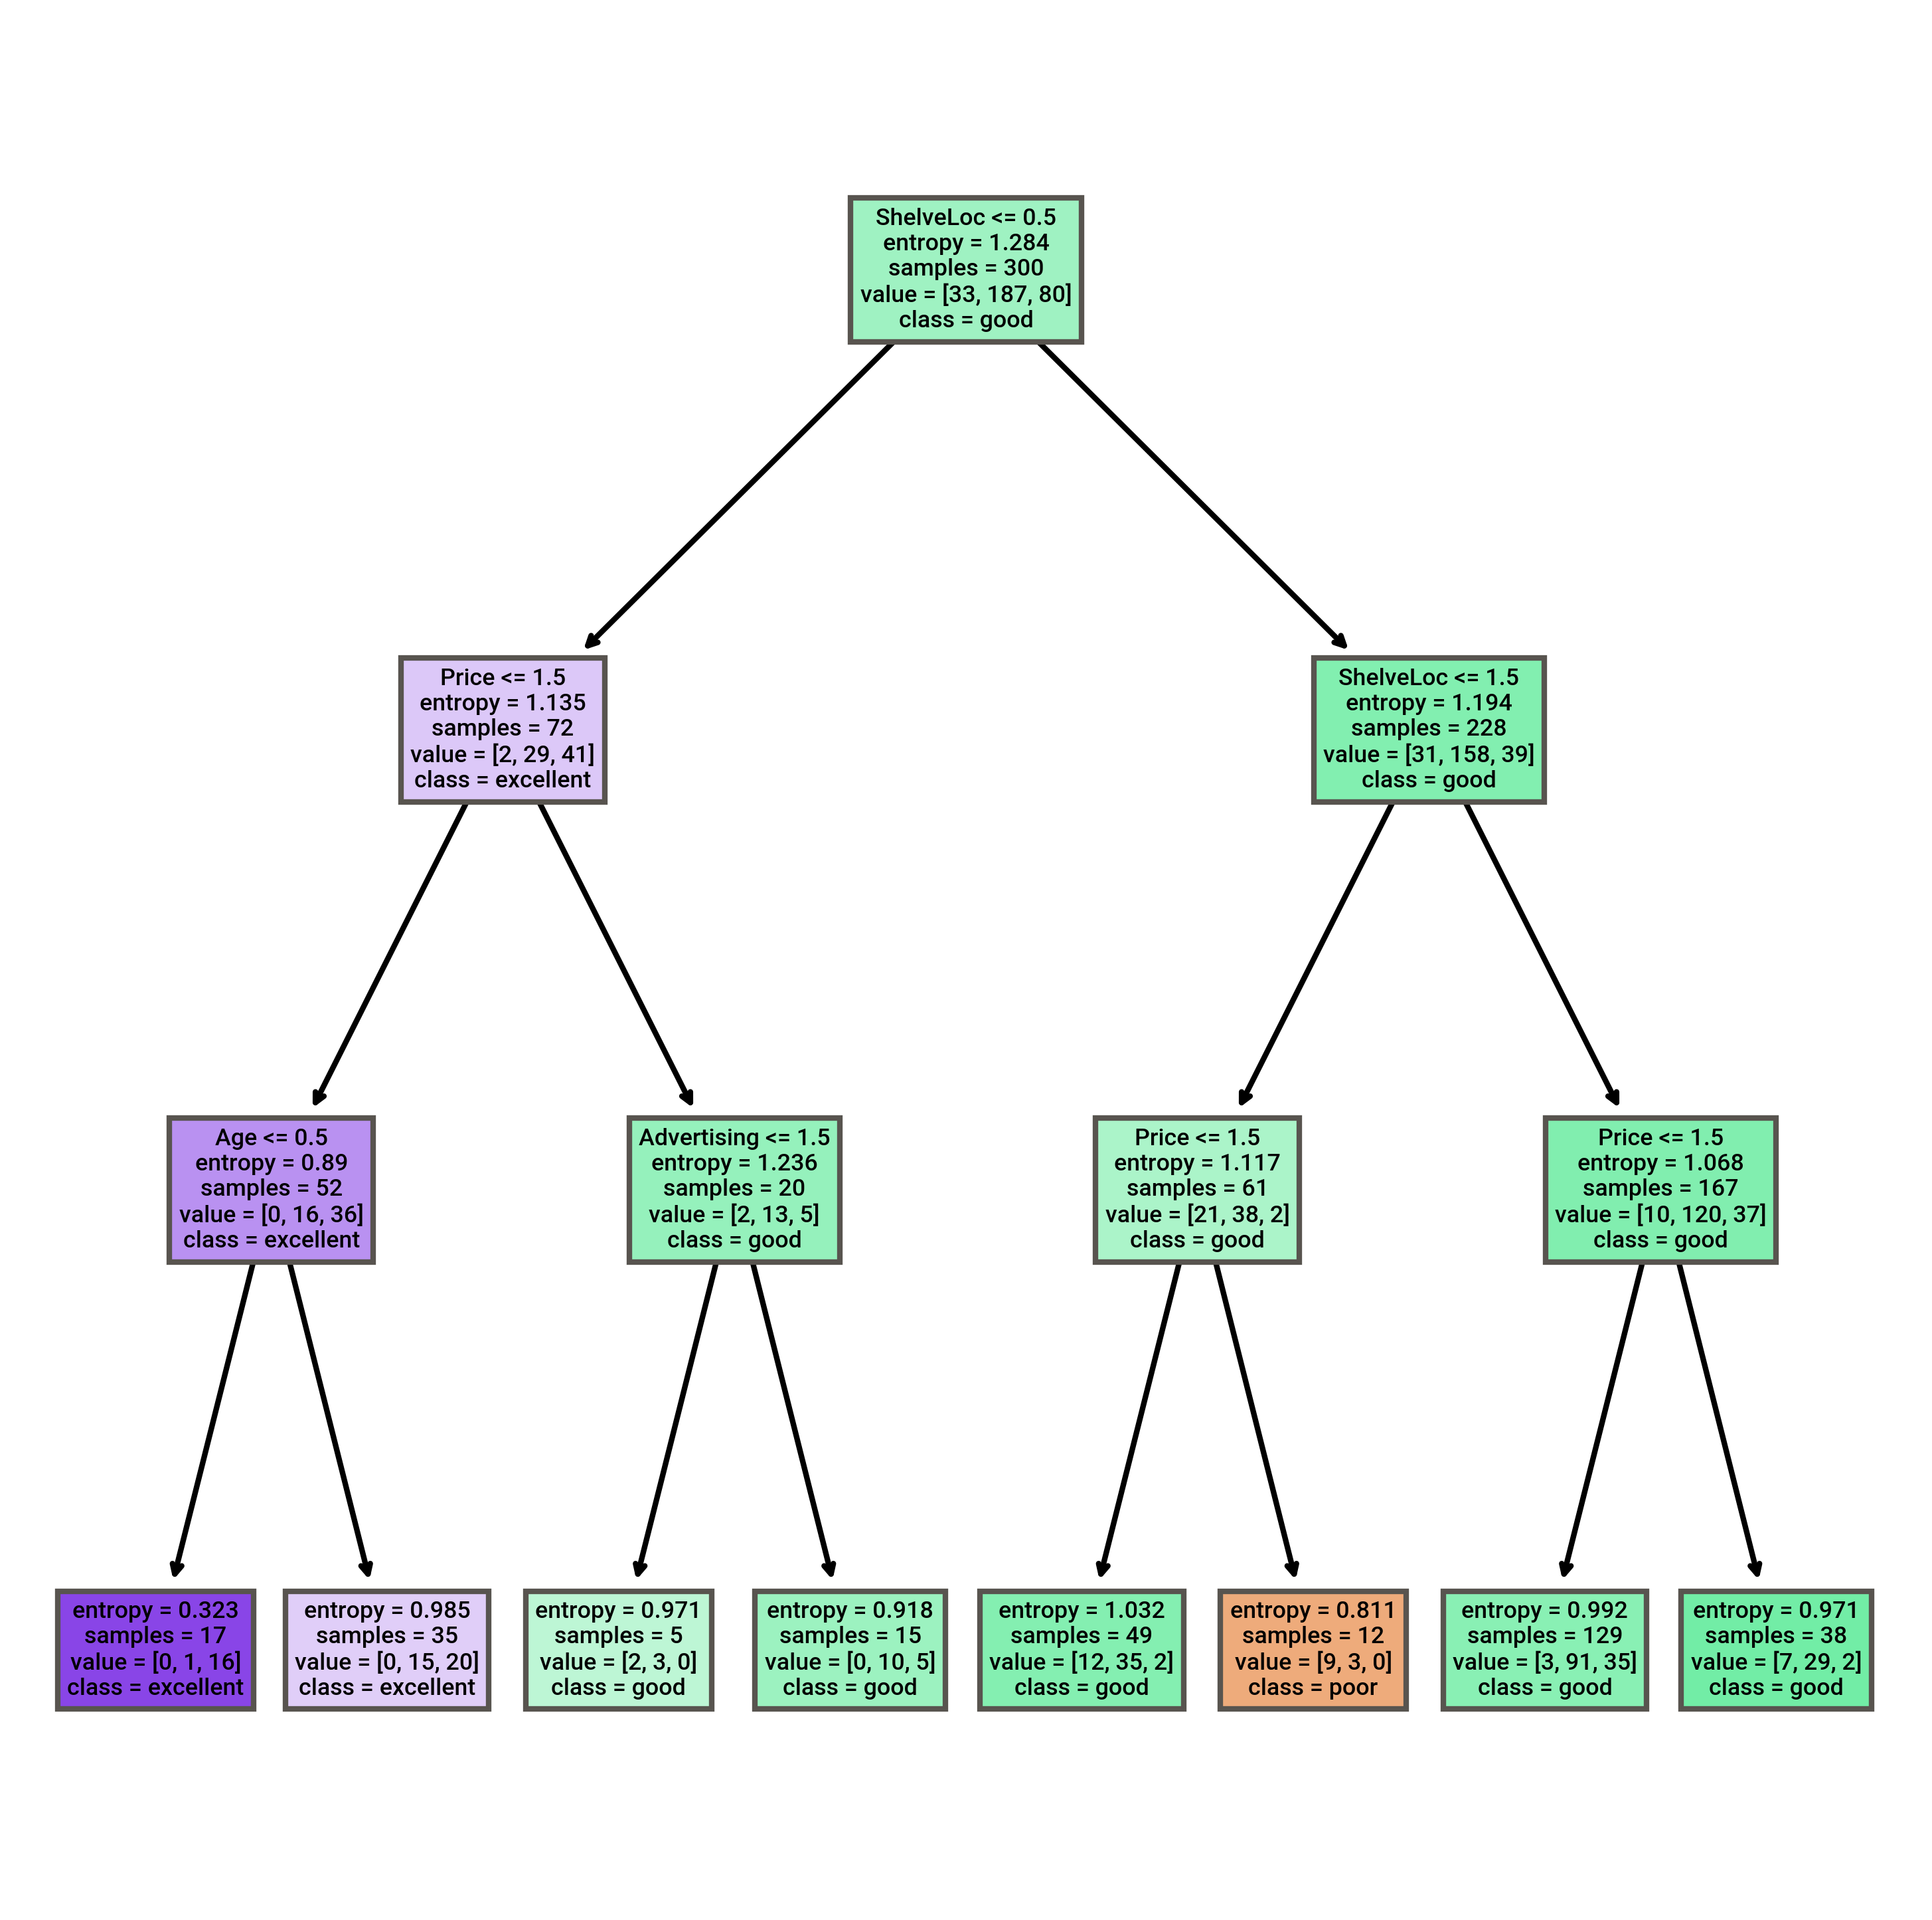

In [106]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['poor', 'good', 'excellent']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

Shelveloc is our root node followed by Price.



In [107]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_5 <= 0.50
|   |--- feature_4 <= 1.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.50
|   |   |   |--- class: 2
|   |--- feature_4 >  1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.50
|   |   |   |--- class: 1
|--- feature_5 >  0.50
|   |--- feature_5 <= 1.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 0
|   |--- feature_5 >  1.50
|   |   |--- feature_4 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  1.50
|   |   |   |--- class: 1



In [108]:
model.feature_importances_ 

array([0.        , 0.        , 0.06009944, 0.        , 0.31463192,
       0.56278557, 0.06248307, 0.        , 0.        , 0.        ])

In [109]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

ShelveLoc      0.562786
Price          0.314632
Age            0.062483
Advertising    0.060099
CompPrice      0.000000
Income         0.000000
Population     0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

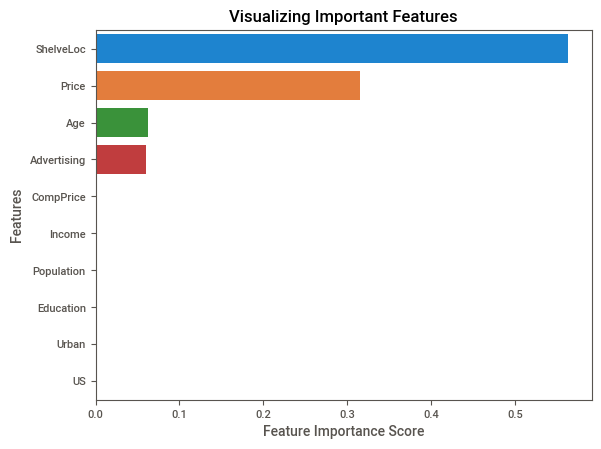

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [111]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    76
2    16
0     8
dtype: int64

In [112]:
preds

array([1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1])

In [113]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,7,9,0
1,1,56,4
2,0,11,12


In [114]:
np.mean(preds==y_test)

0.75

our model accuracy is 75% 

# Building Decision Tree Classifier (CART) using Gini Criteria

In [115]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [116]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [117]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.75

when we apply CART model our accuracy is 75%

In [118]:
model.feature_importances_ 

array([0.        , 0.        , 0.06009944, 0.        , 0.31463192,
       0.56278557, 0.06248307, 0.        , 0.        , 0.        ])

IG value 0.56 Shelvloc is our root node and IG value 0.314 Price is our next important feature